# Linear methods for regression

## Ordinary least squares

Linear regression models the **output**, or **target** variable $y \in \mathrm{R}$ as a linear combination of the $(P-1)$-dimensional input $x \in \mathrm{R}^{(P-1)}$. Let $\mathbf{X}$ be the $N \times P$ matrix with each row an input vector (with a 1 in the first position), and similarly let $y$ be the $N$-dimensional vector of outputs in the **training set**, the linear model will predict the $\mathbf{y}$ given $\mathbf{\mathbf{X}}$ using the **parameter vector**, or **weight vector** $\mathbf{\boldsymbol{\beta}} \in \mathrm{R}^P$ according to

$$
\mathbf{y} = \mathbf{\mathbf{X}} \boldsymbol{\boldsymbol{\beta}} + \boldsymbol{\varepsilon},
$$

where $\boldsymbol{\varepsilon} \in \mathrm{R}^N$ are the **residuals**, or the errors of the prediction. The $\boldsymbol{\beta}$ is found by minimizing an **objective function**, which is the **loss function**, $\mathcal{L}(\boldsymbol{\beta})$, i.e. the error measured on the data. This error is the **sum of squared errors (SSE) loss**. Minimizing the SSE is the Ordinary Least Square **OLS** regression as objective function.

\begin{align}
\text{OLS}(\boldsymbol{\beta}) &= \mathcal{L}(\boldsymbol{\beta})\\
               &= \text{SSE}(\boldsymbol{\beta})\\
               &= \sum_i^N (y_i - \mathbf{x}_i^T\boldsymbol{\beta})^2\\
               &= (\mathbf{y} - \mathbf{\mathbf{X}}\boldsymbol{\beta})^T (\mathbf{y} - \mathbf{X}\boldsymbol{\beta})\\
               &= \|\mathbf{y} - \mathbf{\mathbf{X}}\boldsymbol{\beta}\|_2^2,
\end{align}

which is a simple **ordinary least squares (OLS)** minimization.

## Linear regression with scikit-learn

Scikit learn offer many models for supervised learning, and they all follow the same application programming interface (API), namely:
```
model = Estimator()
model.fit(X, y)
predictions = model.predict(X)
```

R-squared = 0.897194261083
Coefficients = [ 0.04575482  0.18799423]


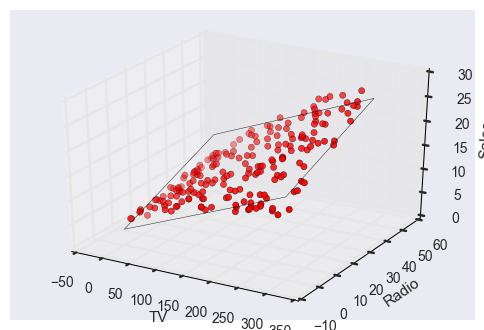

In [13]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model as lm
import sklearn.metrics as metrics
%matplotlib inline

# Fit Ordinary Least Squares: OLS
csv = pd.read_csv('ftp://ftp.cea.fr/pub/unati/people/educhesnay/pystatml/data/Advertising.csv', index_col=0)
X = csv[['TV', 'Radio']]
y = csv['Sales']

lr = lm.LinearRegression().fit(X, y)
y_pred = lr.predict(X)
print("R-squared =", metrics.r2_score(y, y_pred))

print("Coefficients =", lr.coef_)

# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(csv['TV'], csv['Radio'], csv['Sales'], c='r', marker='o')

xx1, xx2 = np.meshgrid(
    np.linspace(csv['TV'].min(), csv['TV'].max(), num=10),
    np.linspace(csv['Radio'].min(), csv['Radio'].max(), num=10))


XX = np.column_stack([xx1.ravel(), xx2.ravel()])

yy = lr.predict(XX)
ax.plot_surface(xx1, xx2, yy.reshape(xx1.shape), color='None')
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
_ = ax.set_zlabel('Sales')

## Overfitting

In statistics and machine learning, overfitting occurs when a statistical model describes random errors or noise instead of the underlying relationships. Overfitting generally occurs when a model is **excessively complex**, such as having **too many parameters relative to the number of observations**. A model that has been overfit will generally have poor predictive performance, as it can exaggerate minor fluctuations in the data.

A learning algorithm is trained using some set of training samples. If the learning algorithm has the capacity to overfit the training samples the performance on the **training sample set** will improve while the performance on unseen **test sample set** will decline.

The overfitting phenomenon has three main explanations:
 - excessively complex models,
 - multicollinearity, and
 - high dimensionality.

### Model complexity

Complex learners with too many parameters relative to the number of observations may overfit the training dataset.


### Multicollinearity

Predictors are highly correlated, meaning that one can be linearly predicted from the others. In this situation the coefficient estimates of the multiple regression may change erratically in response to small changes in the model or the data. Multicollinearity does not reduce the predictive power or reliability of the model as a whole, at least not within the sample data set; it only affects computations regarding individual predictors. That is, a multiple regression model with correlated predictors can indicate how well the entire bundle of predictors predicts the outcome variable, but it may not give valid results about any individual predictor, or about which predictors are redundant with respect to others. In case of perfect multicollinearity the predictor matrix is singular and therefore cannot be inverted. Under these circumstances, for a general linear model $\mathbf{y} = \mathbf{X} \boldsymbol{\beta} + \boldsymbol{\varepsilon}$, the ordinary least-squares estimator, $\boldsymbol{\beta}_{OLS} = (\mathbf{X}^T \mathbf{X})^{-1}\mathbf{X}^T \mathbf{y}$, does not exist.

An example where correlated predictor may produce an unstable model follows:

In [14]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

bv = np.array([10, 20, 30, 40, 50])             # business volume
tax  = .2 * bv                                  # Tax
bp = .1 * bv + np.array([-.1, .2, .1, -.2, .1]) # business potential

X = np.column_stack([bv, tax])
beta_star = np.array([.1, 0])  # true solution

'''
Since tax and bv are correlated, there is an infinite number of linear combinations
leading to the same prediction.
'''
 
# 10 times the bv then subtract it 9 times using the tax variable: 
beta_medium = np.array([.1 * 10, -.1 * 9 * (1/.2)])
# 100 times the bv then subtract it 99 times using the tax variable: 
beta_large = np.array([.1 * 100, -.1 * 99 * (1/.2)])

# Check that all model lead to the same result
assert np.all(np.dot(X, beta_star) == np.dot(X, beta_medium))
assert np.all(np.dot(X, beta_star) == np.dot(X, beta_large))

Multicollinearity between the predictors:  business volumes and tax produces unstable models with arbitrary large coefficients.
![Multicollinearity between the predictors](images/shrinkage/ols_multicollinearity.png)

Dealing with multicollinearity:

- Regularisation by e.g. $\ell_2$ shrinkage: Introduce a bias in the solution by making $(X^T X)^{-1}$ non-singular. See $\ell_2$ shrinkage.

- Feature selection: select a small number of features. See: Isabelle Guyon and André Elisseeff *An introduction to variable and feature selection* The Journal of Machine Learning Research, 2003.

- Feature selection: select a small number of features using $\ell_1$ shrinkage.

- Extract few independent (uncorrelated) features using e.g. principal components analysis (PCA), partial least squares regression (PLS-R) or regression methods that cut the number of predictors to a smaller set of uncorrelated components.


### High dimensionality

High dimensions means a large number of input features. Linear predictor associate one parameter to each input feature, so a high-dimensional situation ($P$, number of features, is large) with a relatively small number of samples $N$ (so-called large $P$ small $N$ situation) generally lead to an overfit of the training data. Thus it is generally a bad idea to add many input features into the learner. This phenomenon is called the **curse of dimensionality**.

One of the most important criteria to use when choosing a learning algorithm is based on the relative size of $P$ and $N$.

- Remenber that the "covariance" matrix $\mathbf{X}^T\mathbf{X}$ used in the linear model is a $P \times P$ matrix of rank $\min(N, P)$. Thus if $P > N$ the equation system is overparameterized and admit an infinity of solutions that might be specific to the learning dataset. See also ill-conditioned or singular matrices.

- The sampling density of $N$ samples in an $P$-dimensional space is proportional to $N^{1/P}$. Thus a high-dimensional space becomes very sparse, leading to poor estimations of samples densities.

- Another consequence of the sparse sampling in high dimensions is that all sample points are close to an edge of the sample. Consider $N$ data points uniformly distributed in a $P$-dimensional unit ball centered at the origin. Suppose we consider a nearest-neighbor estimate at the origin. The median distance from the origin to the closest data point is given by the expression

$$
d(P, N) = \left(1 - \frac{1}{2}^N\right)^{1/P}.
$$

A more complicated expression exists for the mean distance to the closest point. For N = 500, P = 10 , $d(P, N ) \approx 0.52$, more than halfway to the boundary. Hence most data points are closer to the boundary of the sample space than to any other data point. The reason that this presents a problem is that prediction is much more difficult near the edges of the training sample. One must extrapolate from neighboring sample points rather than interpolate between them.
(Source: T Hastie, R Tibshirani, J Friedman. *The Elements of Statistical Learning: Data Mining, Inference, and Prediction.* Second Edition, 2009.)

- Structural risk minimization provides a theoretical background of this phenomenon. (See VC dimension.)

- See also bias–variance trade-off.

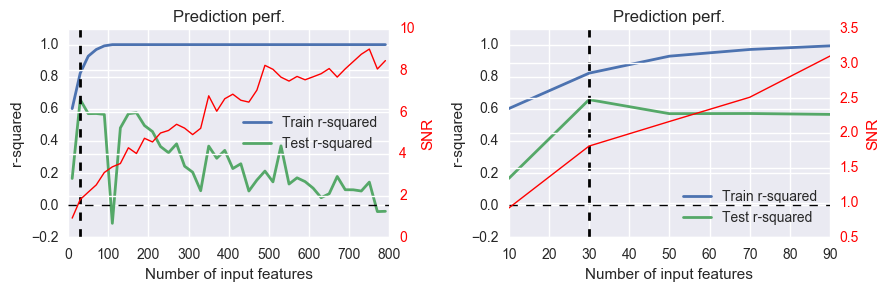

In [15]:
import seaborn # nicer plots

def fit_on_increasing_size(model):
    n_samples = 100
    n_features_ = np.arange(10, 800, 20)
    r2_train, r2_test, snr = [], [], []
    for n_features in n_features_:
        # Sample the dataset (* 2 nb of samples)
        n_features_info = int(n_features/10)
        np.random.seed(42)  # Make reproducible
        X = np.random.randn(n_samples * 2, n_features)
        beta = np.zeros(n_features)
        beta[:n_features_info] = 1
        Xbeta = np.dot(X, beta)
        eps = np.random.randn(n_samples * 2)
        y =  Xbeta + eps
        # Split the dataset into train and test sample
        Xtrain, Xtest = X[:n_samples, :], X[n_samples:, :]
        ytrain, ytest = y[:n_samples], y[n_samples:]
        # fit/predict
        lr = model.fit(Xtrain, ytrain)
        y_pred_train = lr.predict(Xtrain)
        y_pred_test = lr.predict(Xtest)
        snr.append(Xbeta.std() / eps.std())
        r2_train.append(metrics.r2_score(ytrain, y_pred_train))
        r2_test.append(metrics.r2_score(ytest, y_pred_test))
    return n_features_, np.array(r2_train), np.array(r2_test), np.array(snr)

def plot_r2_snr(n_features_, r2_train, r2_test, xvline, snr, ax):
    """
    Two scales plot. Left y-axis: train test r-squared. Right y-axis SNR.
    """
    ax.plot(n_features_, r2_train, label="Train r-squared", linewidth=2)
    ax.plot(n_features_, r2_test, label="Test r-squared", linewidth=2)
    ax.axvline(x=xvline, linewidth=2, color='k', ls='--')
    ax.axhline(y=0, linewidth=1, color='k', ls='--')
    ax.set_ylim(-0.2, 1.1)
    ax.set_xlabel("Number of input features")
    ax.set_ylabel("r-squared")
    ax.legend(loc='best')
    ax.set_title("Prediction perf.")
    ax_right = ax.twinx()
    ax_right.plot(n_features_, snr, 'r-', label="SNR", linewidth=1)
    ax_right.set_ylabel("SNR", color='r')
    for tl in ax_right.get_yticklabels():
        tl.set_color('r')

# Model = linear regression
mod = lm.LinearRegression()

# Fit models on dataset
n_features, r2_train, r2_test, snr = fit_on_increasing_size(model=mod)

argmax = n_features[np.argmax(r2_test)]

# plot
fig, axis = plt.subplots(1, 2, figsize=(9, 3))

# Left pane: all features
plot_r2_snr(n_features, r2_train, r2_test, argmax, snr, axis[0])

# Right pane: Zoom on 100 first features
plot_r2_snr(n_features[n_features <= 100], 
            r2_train[n_features <= 100], r2_test[n_features <= 100],
            argmax,
            snr[n_features <= 100],
            axis[1])
plt.tight_layout()

### Exercises

Study the code above and:

- Describe the datasets: $N$: `nb_samples`, $P$: `nb_features`.

- What is `n_features_info`?

- Give the equation of the generative model.

- What is modified by the loop?

- What is the SNR?


Comment the graph above, in terms of training and test performances:

- How does the train and test performance changes as a function of $x$?

- Is it the expected results when compared to the SNR?

- What can you conclude?

## Ridge regression ($\ell_2$-regularization)

Overfitting generally leads to excessively complex weight vectors, accounting for noise or spurious correlations within predictors. To avoid this phenomenon the learning should **constrain the solution** in order to fit a global pattern. This constraint will reduce (bias) the capacity of the learning algorithm. Adding such a penalty will force the coefficients to be small, i.e. to shrink them toward zeros.

Therefore the **loss function** $\mathcal{L}(\boldsymbol{\beta})$ (generally the SSE) is combined with a **penalty function** $\Omega(\boldsymbol{\beta})$ leading to the general form:

$$
\text{Penalized}(\boldsymbol{\beta}) = \mathcal{L}(\boldsymbol{\beta}) + \lambda \Omega(\boldsymbol{\beta})
$$

The respective contribution of the loss and the penalty is controlled by the **regularization parameter** $\lambda$.

Ridge regression impose a $\ell_2$ penalty on the coefficients, i.e. it penalizes with the Euclidean norm of the coefficients while minimizing SSE. The objective function becomes:

$$
\text{Ridge}(\boldsymbol{\beta}) = \|\mathbf{y} - \mathbf{X}\boldsymbol{\beta}\|_2^2 + \lambda \|\boldsymbol{\beta}\|_2^2.
$$

The $\boldsymbol{\beta}$ that minimises $F_{Ridge}(\boldsymbol{\beta})$ can be found by the following derivation:

\begin{align}
\nabla_{\boldsymbol{\beta}}\text{Ridge}(\boldsymbol{\beta}) &= 0\\
\nabla_{\boldsymbol{\beta}}\big((\mathbf{y} - \mathbf{X}\boldsymbol{\beta})^T (\mathbf{y} - \mathbf{X}\boldsymbol{\beta}) + \lambda \boldsymbol{\beta}^T\boldsymbol{\beta}\big) &= 0\\
\nabla_{\boldsymbol{\beta}}\big((\mathbf{y}^T\mathbf{y} - 2 \boldsymbol{\beta}^T\mathbf{X}^T\mathbf{y} + \boldsymbol{\beta}^T\mathbf{X}^T\mathbf{X}\boldsymbol{\beta} + \lambda \boldsymbol{\beta}^T\boldsymbol{\beta})\big) &= 0\\
-2\mathbf{X}^T\mathbf{y} + 2 \mathbf{X}^T\mathbf{X}\boldsymbol{\beta} + 2 \lambda \boldsymbol{\beta} &= 0\\
-\mathbf{X}^T\mathbf{y} + (\mathbf{X}^T\mathbf{X} + \lambda \mathbf{I}) \boldsymbol{\beta} &= 0\\
(\mathbf{X}^T\mathbf{X} + \lambda \mathbf{I}) \boldsymbol{\beta} &= \mathbf{X}^T\mathbf{y}\\
\boldsymbol{\beta} &= (\mathbf{X}^T\mathbf{X} + \lambda \mathbf{I})^{-1} \mathbf{X}^T\mathbf{y}
\end{align}

- The solution adds a positive constant to the diagonal of $\mathbf{X}^T\mathbf{X}$ before inversion. This makes the problem nonsingular, even if $\mathbf{X}^T\mathbf{X}$ is not of full rank, and was the main motivation behind ridge regression.

- Increasing $\lambda$ shrinks the $\boldsymbol{\beta}$ coefficients toward 0.

- This approach **penalizes** the objective function by the **Euclidian ($\ell_2$) norm** of the coefficients such that solutions with large coefficients become unattractive.

The ridge penalty shrinks the coefficients toward zero. The figure illustrates: the OLS solution on the left. The $\ell_1$ and $\ell_2$ penalties in the middle pane. The penalized OLS in the right pane. The right pane shows how the penalties shrink the coefficients toward zero. The black points are the minimum found in each case, and the white points represents the true solution used to generate the data.

![$\ell_1$ and $\ell_2$ shrinkages](images/shrinkage/ols_l1_l2.png)

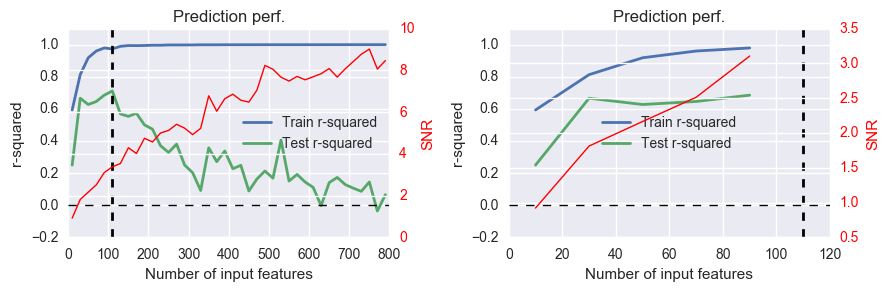

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.linear_model as lm

# lambda is alpha!
mod = lm.Ridge(alpha=10)

# Fit models on dataset
n_features, r2_train, r2_test, snr = fit_on_increasing_size(model=mod)

argmax = n_features[np.argmax(r2_test)]

# plot
fig, axis = plt.subplots(1, 2, figsize=(9, 3))

# Left pane: all features
plot_r2_snr(n_features, r2_train, r2_test, argmax, snr, axis[0])

# Right pane: Zoom on 100 first features
plot_r2_snr(n_features[n_features <= 100], 
            r2_train[n_features <= 100], r2_test[n_features <= 100],
            argmax,
            snr[n_features <= 100],
            axis[1])
plt.tight_layout()

### Exercice

What benefit has been obtained by using $\ell_2$ regularization?

## Lasso regression ($\ell_1$-regularization)

Lasso regression penalizes the coefficients by the $\ell_1$ norm. This constraint will reduce (bias) the capacity of the learning algorithm. To add such a penalty forces the coefficients to be small, i.e. it shrinks them toward zero. The objective function to minimize becomes:

\begin{align}
\text{Lasso}(\boldsymbol{\beta}) &= \|\mathbf{y} - \mathbf{X}\boldsymbol{\beta}\|_2^2 + \lambda\|\boldsymbol{\beta}\|_1.
\end{align}

This penalty forces some coefficients to be exactly zero, providing a feature selection property.

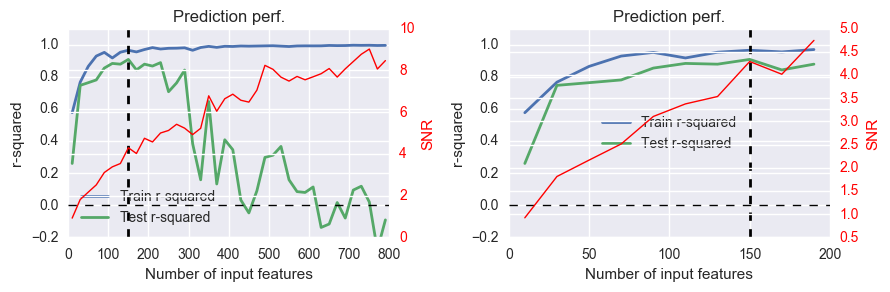

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.linear_model as lm

# lambda is alpha !
mod = lm.Lasso(alpha=.1)

# Fit models on dataset
n_features, r2_train, r2_test, snr = fit_on_increasing_size(model=mod)

argmax = n_features[np.argmax(r2_test)]

# plot
fig, axis = plt.subplots(1, 2, figsize=(9, 3))

# Left pane: all features
plot_r2_snr(n_features, r2_train, r2_test, argmax, snr, axis[0])

# Right pane: Zoom on 200 first features
plot_r2_snr(n_features[n_features <= 200], 
            r2_train[n_features <= 200], r2_test[n_features <= 200],
            argmax,
            snr[n_features <= 200],
            axis[1])
plt.tight_layout()

### Sparsity of the $\ell_1$ norm

#### Occam's razor

Occam's razor (also written as Ockham's razor, and **lex parsimoniae** in Latin, which means law of parsimony) is a problem solving principle attributed to William of Ockham (1287-1347), who was an English Franciscan friar and scholastic philosopher and theologian. The principle can be interpreted as stating that **among competing hypotheses, the one with the fewest assumptions should be selected**.

#### Principle of parsimony

The simplest of two competing theories is to be preferred. Definition of parsimony: Economy of explanation in conformity with Occam's razor.

Among possible models with similar loss, choose the simplest one: 

- Choose the model with the smallest coefficient vector, i.e. smallest $\ell_2$ ($\|\boldsymbol{\beta}\|_2$) or $\ell_1$ ($\|\boldsymbol{\beta}\|_1$) norm of $\boldsymbol{\beta}$, i.e. $\ell_2$ or $\ell_1$ penalty. See also bias-variance tradeoff.

- Choose the model that uses the smallest number of predictors. In other words, choose the model that has many predictors with zero weights. Two approaches are available to obtain this: (i) Perform a feature selection as a preprocessing prior to applying the learning algorithm, or (ii) embed the feature selection procedure within the learning process.

#### Sparsity-induced penalty or embedded feature selection with the $\ell_1$ penalty

The penalty based on the $\ell_1$ norm promotes **sparsity** (scattered, or not dense): it forces many coefficients to be exactly zero. This also makes the coefficient vector scattered.

The figure bellow illustrates the OLS loss under a constraint acting on the $\ell_1$ norm of the coefficient vector. I.e., it illustrates the following optimization problem:

$$
\begin{aligned}
    \underset{\boldsymbol{\beta}}{\text{minimize}} ~& \|\mathbf{y} - \mathbf{X}\boldsymbol{\beta}\|_2^2 \\
    \text{subject to}                 ~& \|\boldsymbol{\beta}\|_1 \leq 1.
\end{aligned}
$$

![Sparsity of L1 norm](images/shrinkage/l1_sparse.png)

### Optimization issues

*Section to be completed*

- No more closed-form solution.

- Convex but not differentiable.

- Requires specific optimization algorithms, such as the fast iterative shrinkage-thresholding algorithm (FISTA): Amir Beck and Marc Teboulle, *A Fast Iterative Shrinkage-Thresholding Algorithm for Linear Inverse Problems* SIAM J. Imaging Sci., 2009.

## Elastic-net regression ($\ell_2$-$\ell_1$-regularization)

The Elastic-net estimator combines the $\ell_1$ and $\ell_2$ penalties, and results in the problem to

\begin{align}
\text{Enet}(\boldsymbol{\beta}) &= \|\mathbf{y} - \mathbf{X}^T\boldsymbol{\beta}\|_2^2 + \alpha \left(\rho~\|\boldsymbol{\beta}\|_1 + (1-\rho)~\|\boldsymbol{\beta}\|_2^2 \right),
\end{align}

where $\alpha$ acts as a global penalty and $\rho$ as an $\ell_1 / \ell_2$ ratio.

### Rationale

- If there are groups of highly correlated variables, Lasso tends to arbitrarily select only one from each group. These models are difficult to interpret because covariates that are strongly associated with the outcome are not included in the predictive model. Conversely, the elastic net encourages a grouping effect, where strongly correlated predictors tend to be in or out of the model together.

- Studies on real world data and simulation studies show that the elastic net often outperforms the lasso, while enjoying a similar sparsity of representation.

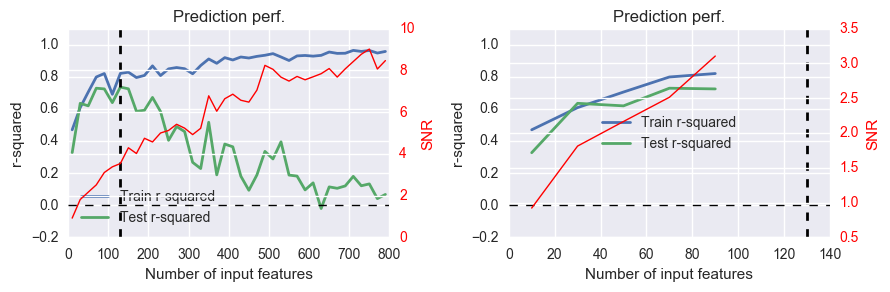

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.linear_model as lm

mod = lm.ElasticNet(alpha=.5, l1_ratio=.5)

# Fit models on dataset
n_features, r2_train, r2_test, snr = fit_on_increasing_size(model=mod)

argmax = n_features[np.argmax(r2_test)]

# plot
fig, axis = plt.subplots(1, 2, figsize=(9, 3))

# Left pane: all features
plot_r2_snr(n_features, r2_train, r2_test, argmax, snr, axis[0])

# Right pane: Zoom on 100 first features
plot_r2_snr(n_features[n_features <= 100], 
            r2_train[n_features <= 100], r2_test[n_features <= 100],
            argmax,
            snr[n_features <= 100],
            axis[1])
plt.tight_layout()